# Iterative Prompt Development
In this lesson, you'll iteratively analyze and refine your prompts to generate marketing copy from a product fact sheet.

## Setup

In [1]:
import openai
import os

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [2]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

**Note**: In June 2023, OpenAI updated gpt-3.5-turbo. The results you see in the notebook may be slightly different than those in the video. Some of the prompts have also been slightly modified to product the desired results.

## Generate a marketing product description from a product fact sheet

In [3]:
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture, 
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100) 
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black, 
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

OPTIONS
- Soft or hard-floor caster options.
- Two choices of seat foam densities: 
 medium (1.8 lb/ft3) or high (2.8 lb/ft3)
- Armless or 8 position PU armrests 

MATERIALS
SHELL BASE GLIDER
- Cast Aluminum with modified nylon PA6/PA66 coating.
- Shell thickness: 10 mm.
SEAT
- HD36 foam

COUNTRY OF ORIGIN
- Italy
"""

In [4]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our stylish and versatile mid-century inspired office chair, perfect for both home and business settings. This chair is part of a beautiful family of office furniture that includes filing cabinets, desks, bookcases, meeting tables, and more.

Customize your chair with several options of shell color and base finishes to suit your personal style. Choose between plastic back and front upholstery or full upholstery in a variety of fabric and leather options. The base finish options include stainless steel, matte black, gloss white, or chrome. You can also choose to have armrests or go for a sleek armless design.

Constructed with a 5-wheel plastic coated aluminum base, this chair features a pneumatic chair adjust for easy raise/lower action. The dimensions of the chair are as follows: width 53 cm, depth 51 cm, height 80 cm, seat height 44 cm, and seat depth 41 cm.

Personalize your chair even further with options such as soft or hard-floor caster options, two choices of seat fo

## Issue 1: The text is too long 
- Limit the number of words/sentences/characters.

In [5]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)


Introducing our versatile and stylish mid-century office chair, available in a range of colors and finishes. With adjustable height and comfortable upholstery options, this chair is perfect for both home and business use. Made in Italy with quality materials, it's a perfect blend of form and function.


In [6]:
len(response.split())

47

## Issue 2. Text focuses on the wrong details
- Ask it to focus on the aspects that are relevant to the intended audience.

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

In [ ]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""
response = get_completion(prompt)
print(response)

## Issue 3. Description needs a table of dimensions
- Ask it to extract information and organize it in a table.

In [10]:
prompt = f"""
Your task is to help a marketing team create a 
description for a retail website of a product based 
on a technical fact sheet.

Write a product description based on the information 
provided in the technical specifications delimited by 
triple backticks.

The description is intended for furniture retailers, 
so should be technical in nature and focus on the 
materials the product is constructed from.

At the end of the description, include every 7-character 
Product ID in the technical specification.

After the description, include a table that gives the 
product's dimensions. The table should have two columns.
In the first column include the name of the dimension. 
In the second column include the measurements in inches only.

Give the table the title 'Product Dimensions'.

Format everything as HTML that can be used in a website. 
Place the description in a <div> element.

Use <= 50 worods in the description.

Technical specifications: ```{fact_sheet_chair}```
"""

response = get_completion(prompt)
print(response)

<div>
<p>Introducing our versatile office chair from the mid-century inspired collection. 
Available in various shell colors and base finishes, with options for upholstery 
in fabric or leather. Constructed with a durable aluminum base and high-density foam seat. 
Perfect for both home and office use. Product IDs: SWC-100, SWC-110</p>
</div>

<table>
  <caption>Product Dimensions</caption>
  <tr>
    <th>Dimension</th>
    <th>Measurements (inches)</th>
  </tr>
  <tr>
    <td>WIDTH</td>
    <td>20.87"</td>
  </tr>
  <tr>
    <td>DEPTH</td>
    <td>20.08"</td>
  </tr>
  <tr>
    <td>HEIGHT</td>
    <td>31.50"</td>
  </tr>
  <tr>
    <td>SEAT HEIGHT</td>
    <td>17.32"</td>
  </tr>
  <tr>
    <td>SEAT DEPTH</td>
    <td>16.14"</td>
  </tr>
</table>


## Load Python libraries to view HTML

In [11]:
from IPython.display import display, HTML

In [12]:
display(HTML(response))

Dimension,Measurements (inches)
WIDTH,"20.87"""
DEPTH,"20.08"""
HEIGHT,"31.50"""
SEAT HEIGHT,"17.32"""
SEAT DEPTH,"16.14"""


## Try experimenting on your own!
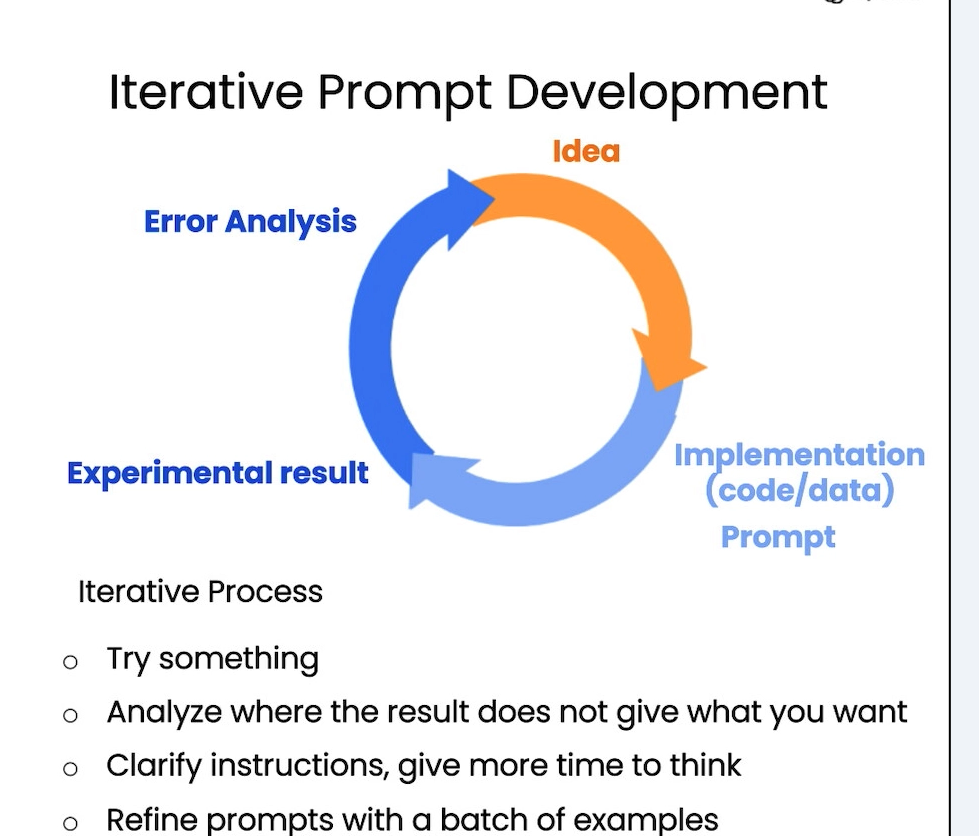